#Credit Card Fraud Prediction

**CS577 Final Project**

**Names:** Brigitte Reyes, Alejandro Gomez, Lili Balazs


### Dataset and Project description

#### Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

The dataset contains information about previous credit card transactions made by European credit card users in 2013. The dataset only has numerical values.

During the analysis we use three different models to predict credit card fraud. The models include Logistic Regression, Random Forest and K-Nearest Neighbour.




## Table of Contents:
* [Data Importing, Exploration and Pre-processing](#data-exploration)
* [Exploratory Data Analysis](#data-eda)
* [Data Analytics](#data-analytics)

##Data Importing, Exploration and Pre-processing

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [ ]:
from google.colab import files
files.upload()
# Import dataset
credit_df = pd.read_csv('creditcard.csv')

Saving creditcard.csv to creditcard.csv


In [ ]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Check number of rows and columns
credit_df.shape

(284807, 31)

In [ ]:
# Get geneal information about the dataframe
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Check the column names
credit_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Check value counts
credit_df.nunique().sort_values(ascending=True)

Class          2
Amount     32767
Time      124592
V3        275663
V28       275663
V27       275663
V26       275663
V25       275663
V24       275663
V23       275663
V22       275663
V21       275663
V20       275663
V19       275663
V18       275663
V17       275663
V16       275663
V1        275663
V14       275663
V13       275663
V12       275663
V11       275663
V10       275663
V9        275663
V8        275663
V7        275663
V6        275663
V5        275663
V4        275663
V2        275663
V15       275663
dtype: int64

In [ ]:
# Check missing values in columns
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

###Check Non-Fraud and Fraud Cases

Text(0.5, 0, 'Class')

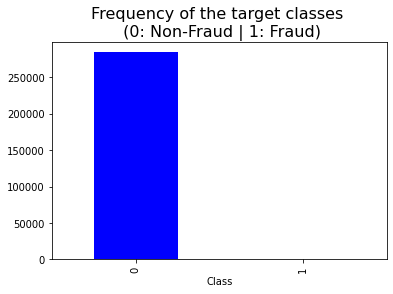

In [ ]:
# Most of the data comes from non-fraud transactions, imbalanced dataset
# Data is skewed
credit_df["Class"].value_counts().plot(kind="bar",color="blue")
plt.title("Frequency of the target classes \n (0: Non-Fraud | 1: Fraud)", size = 16)
plt.xlabel("Class")

In [ ]:
# Fraud cases
fraud=credit_df[credit_df['Class']==1]

In [ ]:
# Number of fraud cases
len(fraud)

492

In [ ]:
# Non-fraud cases
non_fraud=credit_df[credit_df['Class']==0]

In [ ]:
# Number of non-fraud cases
len(non_fraud)

284315

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

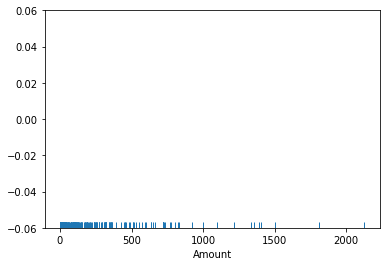

In [ ]:
sns.rugplot(fraud['Amount']);

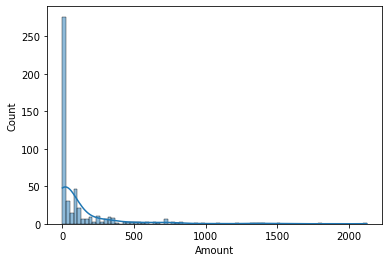

In [ ]:
sns.histplot(fraud['Amount'], kde=True)

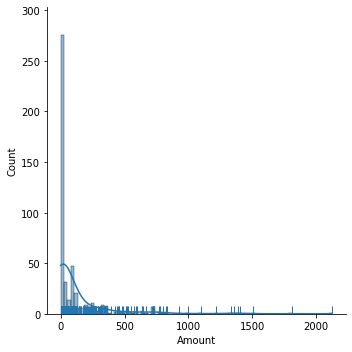

In [ ]:
sns.displot(fraud['Amount'], kde=True, rug=True);

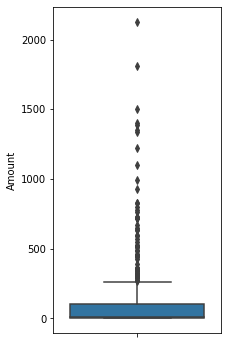

In [ ]:
plt.figure(figsize = (3, 6))
sns.boxplot(y=fraud['Amount']);

In [ ]:
non_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

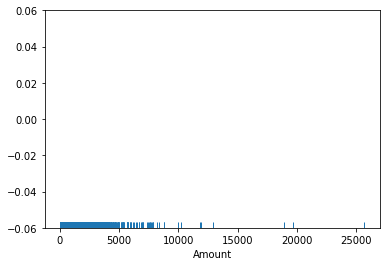

In [ ]:
sns.rugplot(non_fraud['Amount']);

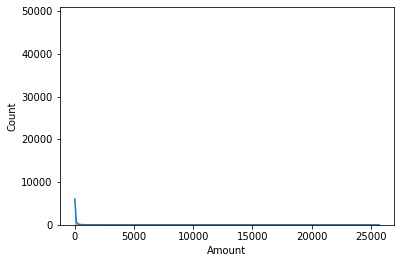

In [ ]:
sns.histplot(non_fraud['Amount'], kde=True)

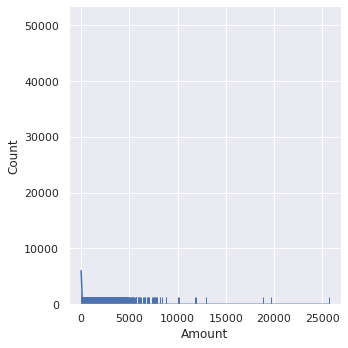

In [ ]:
sns.displot(non_fraud['Amount'], kde=True, rug=True);

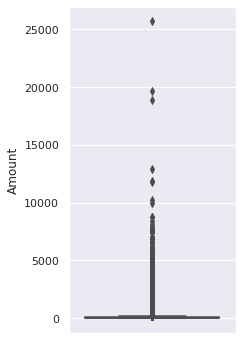

In [ ]:
plt.figure(figsize = (3, 6))
sns.boxplot(y=non_fraud['Amount']);

In [ ]:
# Check outliers and transaction count
outliers = len(fraud)/float(len(non_fraud))

print('Outlier:', outliers)
print('Non-Fraud Transactions: {}'.format(len(credit_df[credit_df['Class'] == 0])))
print('Fraud Transactions: {}'.format(len(credit_df[credit_df['Class'] == 1])))

Outlier: 0.0017304750013189597
Non-Fraud Transactions: 284315
Fraud Transactions: 492


##EDA

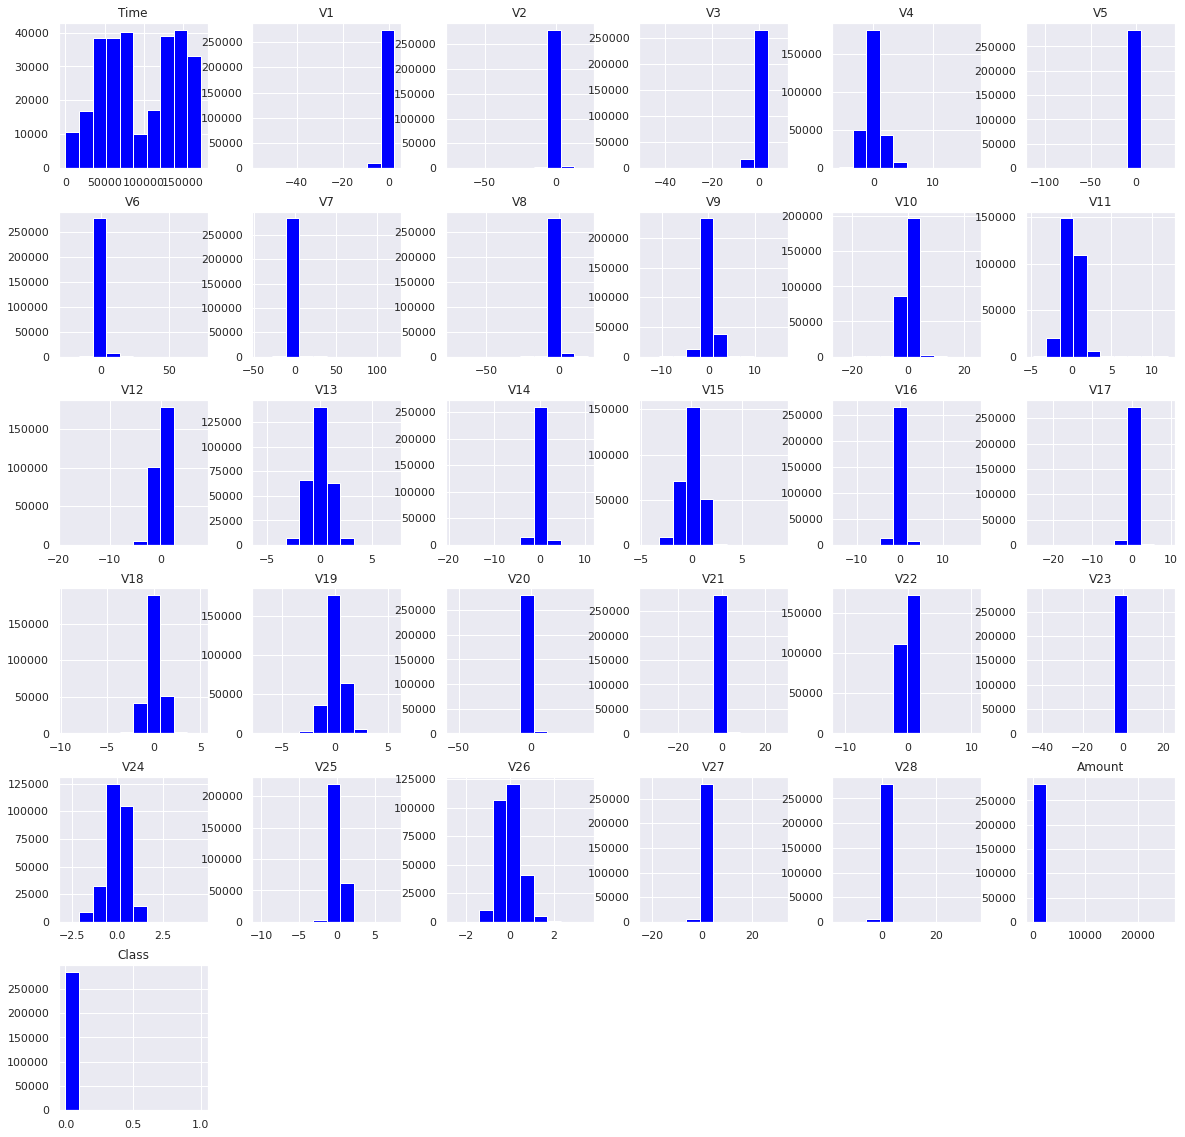

In [ ]:
# Check distribution of data
credit_df.hist(figsize=(20,20),color='blue')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



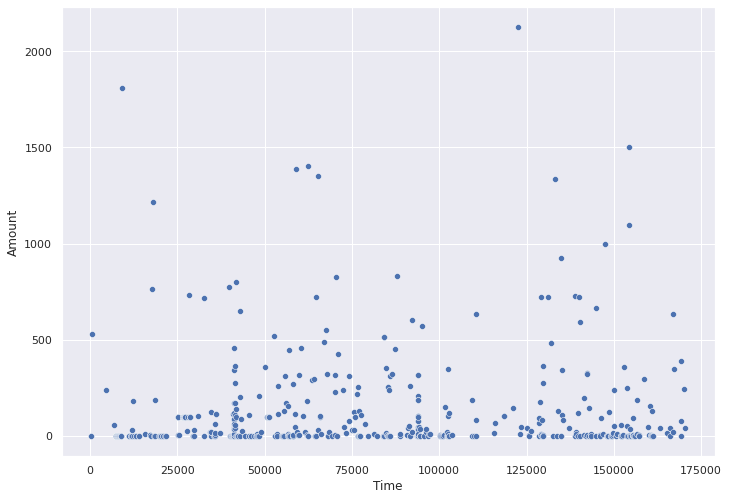

In [ ]:
# Time vs Amount of Fraud cases
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(fraud.Time, fraud.Amount)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



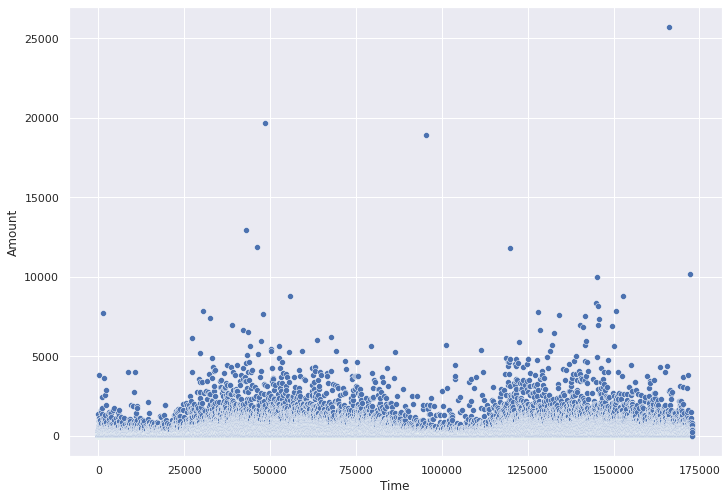

In [ ]:
# Time vs Amount of Non-Fraud cases
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(non_fraud.Time, non_fraud.Amount)

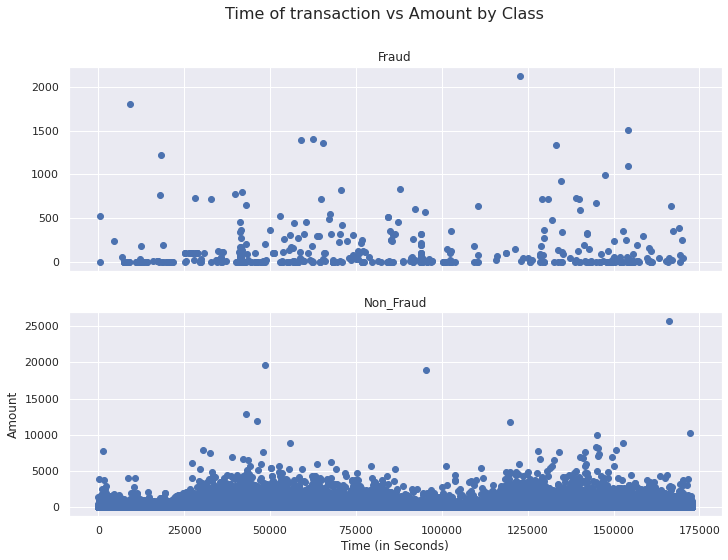

In [ ]:
# Time of transaction vs Amount by Class plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
y,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
y.suptitle('Time of transaction vs Amount by Class', size = 16)
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(non_fraud.Time, non_fraud.Amount)
ax2.set_title('Non_Fraud')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Correlation Matrix

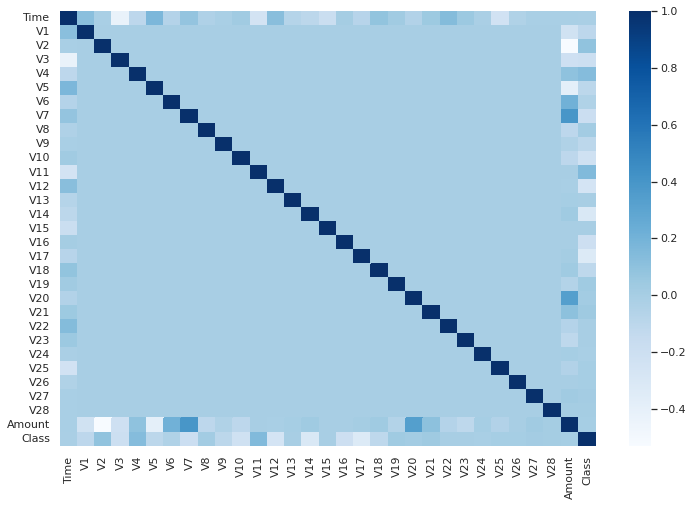

In [ ]:
plt.figure(figsize=(12,8))
corr=credit_df.corr()
sns.heatmap(corr,cmap="Blues")

##Data Analytics

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
import xgboost as xgb
import lightgbm as lgb

Split data

In [ ]:
target = credit_df.iloc[:1, 30: ].columns
features = credit_df.iloc[:, 1:30].columns
print(features)
print(target)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [ ]:
# Get the target and the teatures
target_df = credit_df[target]
features_df = credit_df[features]

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, train_size=0.70, test_size=0.30, random_state=1)

Logistic Regression

In [ ]:
# Fit logistic model
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Prediction
logistic_prediction = logistic_model.predict(X_test)

In [ ]:
# Check the accuracy of the model
accuracy_score(y_test,logistic_prediction)

0.999133925541004

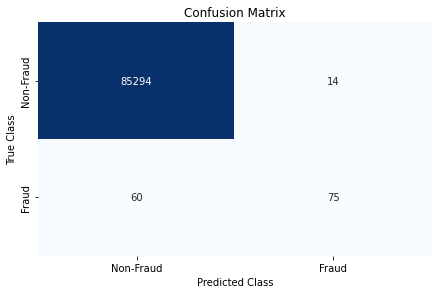

In [ ]:
class_f = ['Non-Fraud', 'Fraud']
matrix = confusion_matrix(y_test, logistic_prediction)
# Create pandas dataframe
lr_cm_df = pd.DataFrame(matrix, index=class_f, columns=class_f)
# Create heatmap
sns.heatmap(lr_cm_df, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
# Precision, recall, f1-score of the model
print(classification_report(y_test, logistic_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.84      0.56      0.67       135

    accuracy                           1.00     85443
   macro avg       0.92      0.78      0.83     85443
weighted avg       1.00      1.00      1.00     85443



Random Forest

In [ ]:
# Fit Random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

<ipython-input-18-c5fdf16da95d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train)


RandomForestClassifier()

In [ ]:
# Prediction
rf_prediction = rf_model.predict(X_test)

In [ ]:
# Check accuracy of the model
accuracy_score(y_test,rf_prediction)

0.9995201479348805

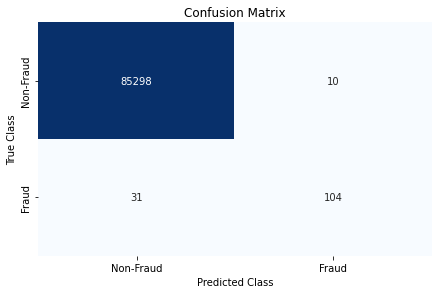

In [ ]:
class_f = ['Non-Fraud', 'Fraud']
matrix = confusion_matrix(y_test, rf_prediction)
# Create pandas dataframe
rf_cm_df = pd.DataFrame(matrix, index=class_f, columns=class_f)
# Create heatmap
sns.heatmap(rf_cm_df, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
# Precision, recall, f1-score of the model
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.91      0.77      0.84       135

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



K-Nearest Neighbour

In [ ]:
# Fit KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
# Prediction
knn_prediction = knn_model.predict(X_test)

In [ ]:
# Check the accuracy of the model
accuracy_score(y_test,knn_prediction)

0.9992392589211521

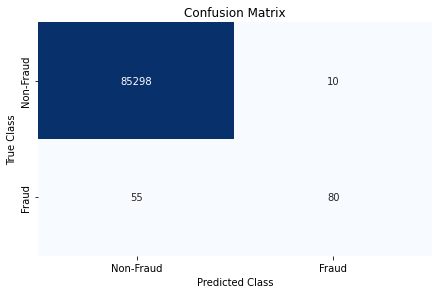

In [ ]:
class_f = ['Non-Fraud', 'Fraud']
matrix = confusion_matrix(y_test, knn_prediction)
# Create pandas dataframe
knn_cm_df = pd.DataFrame(matrix, index=class_f, columns=class_f)
# Create heatmap
sns.heatmap(knn_cm_df, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
# Precision, recall, f1-score of the model
print(classification_report(y_test, knn_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.89      0.59      0.71       135

    accuracy                           1.00     85443
   macro avg       0.94      0.80      0.86     85443
weighted avg       1.00      1.00      1.00     85443

